In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sort_dataframeby_monthorweek as sd
import seaborn as sns
import warnings
warnings.simplefilter("ignore",category=FutureWarning)
pd.set_option("display.max_columns",None)
pd.set_option("display.width",500)
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV,cross_validate
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,f1_score,recall_score

In [2]:
df=pd.read_csv(r"C:\Users\user\Downloads\hotel_bookings.csv")
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [4]:
df.shape

(119390, 32)

In [5]:
Null=pd.DataFrame({"Null Variable": df.isnull().sum(), "Percentage null variable": (df.isnull().sum()/df.shape[0])*100})
Null

,Null Variable,Percentage null variable
hotel,0,0.000000
is_canceled,0,0.000000
lead_time,0,0.000000
arrival_date_year,0,0.000000
arrival_date_month,0,0.000000
arrival_date_week_number,0,0.000000
arrival_date_day_of_month,0,0.000000
stays_in_weekend_nights,0,0.000000
stays_in_week_nights,0,0.000000
adults,0,0.000000


In [6]:
df.fillna(0, inplace = True)

In [7]:
no_guest = list(df.loc[df["adults"]+ df["children"]+ df["babies"]==0].index)
df.drop(df.index[no_guest], inplace=True)

In [8]:
df["hotel"].value_counts()

City Hotel      79163
Resort Hotel    40047
Name: hotel, dtype: int64

In [9]:
ch=df[(df["hotel"]=="City Hotel")&(df["is_canceled"]==0)]
rh=df[(df["hotel"]=="Resort Hotel")&(df["is_canceled"]==0)]

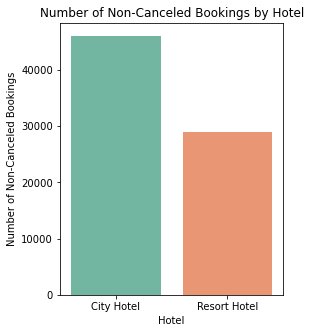

In [10]:
combined_data = pd.concat([ch, rh])
plt.figure(figsize=(4, 5))
sns.countplot(data=combined_data, x="hotel", palette="Set2")
plt.xlabel("Hotel")
plt.ylabel("Number of Non-Canceled Bookings")
plt.title("Number of Non-Canceled Bookings by Hotel")
plt.show()


In [11]:
guests=df[df["is_canceled"]==0]["country"].value_counts().reset_index().head(10)
guests.columns = ['country', 'No of guests']
guests

,country,No of guests
0,PRT,20977
1,GBR,9668
2,FRA,8468
3,ESP,6383
4,DEU,6067
5,IRL,2542
6,ITA,2428
7,BEL,1868
8,NLD,1716
9,USA,1592


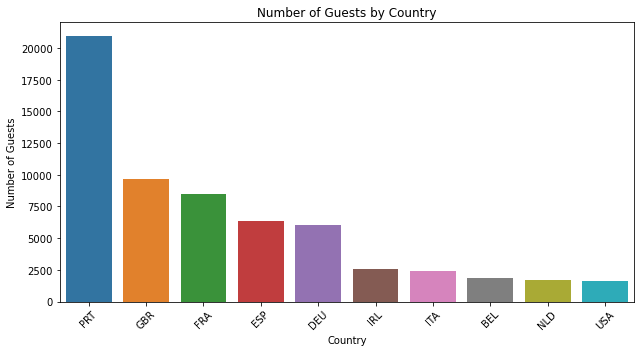

In [12]:
plt.figure(figsize=(9,5))
sns.barplot(data=guests,x="country",y="No of guests")
plt.xlabel("Country")
plt.ylabel("Number of Guests")
plt.title("Number of Guests by Country")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [13]:
rh = rh.copy()
ch = ch.copy()
rh["adr_pp"] = rh["adr"] / (rh["adults"] + rh["children"])
ch["adr_pp"] = ch["adr"] / (ch["adults"] + ch["children"])

In [14]:
#How much do guests pay for a room per night?
print("Resort Hotel: {:.2f}".format(rh["adr_pp"].mean()))
print("City Hotel: {:.2f}".format(ch["adr_pp"].mean()))

Resort Hotel: 47.49
City Hotel: 59.27


In [15]:
#How does the price vary per night over the year?
resort_hotel=rh.groupby(["arrival_date_month"])["adr"].mean().reset_index()
city_hotel=ch.groupby(["arrival_date_month"])["adr"].mean().reset_index()

In [16]:
def sort_month(df, column_name):
    return sd.Sort_Dataframeby_Month(df, column_name)

In [17]:
city_hotel = sort_month(ch, 'arrival_date_month')
resort_hotel = sort_month(rh, 'arrival_date_month')

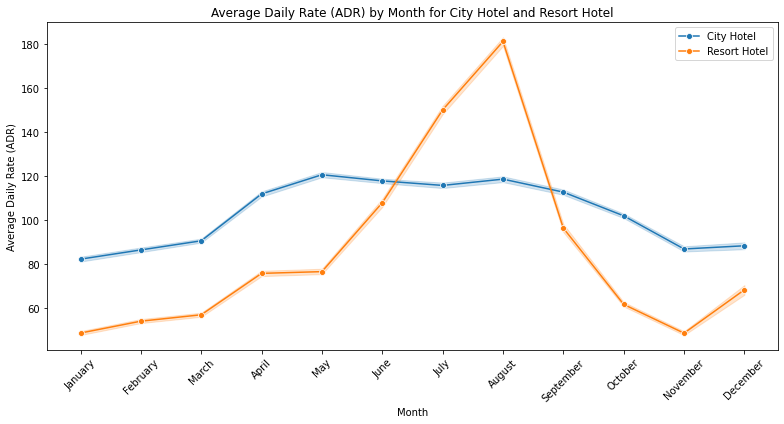

In [18]:
plt.figure(figsize=(11, 6))
sns.lineplot(data=city_hotel, x="arrival_date_month", y="adr", label="City Hotel", marker="o")
sns.lineplot(data=resort_hotel, x="arrival_date_month", y="adr", label="Resort Hotel", marker="o")
plt.xlabel("Month")
plt.ylabel("Average Daily Rate (ADR)")
plt.title("Average Daily Rate (ADR) by Month for City Hotel and Resort Hotel")
plt.xticks(rotation=45) 
plt.legend()
plt.tight_layout()
plt.show()


In [19]:
guests_rh=rh["arrival_date_month"].value_counts().reset_index()
guests_ch=ch["arrival_date_month"].value_counts().reset_index()
guests=guests_rh.merge(guests_ch, on="index")
guests.columns=['month','guests in resort','guests in city']
guests

,month,guests in resort,guests in city
0,August,3257,5367
1,July,3137,4770
2,October,2575,4326
3,March,2571,4049
4,April,2550,4010
5,May,2535,4568
6,February,2308,3051
7,September,2102,4283
8,June,2037,4358
9,December,2014,2377


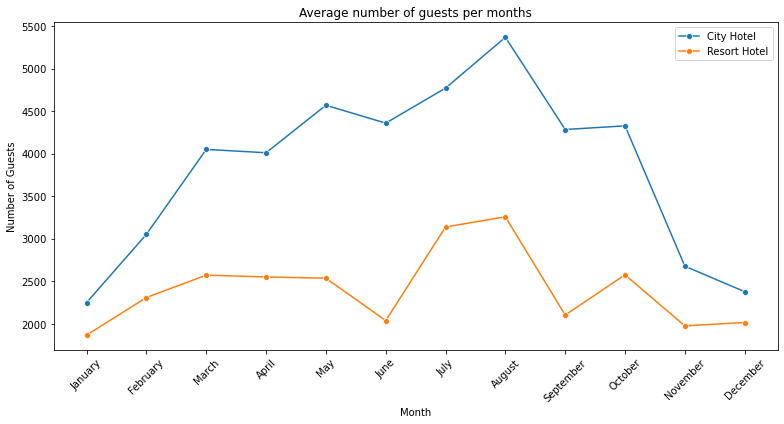

In [20]:
guests=sort_month(guests, "month")
plt.figure(figsize=(11, 6))
sns.lineplot(data=guests, x="month", y="guests in city", label="City Hotel", marker="o")
sns.lineplot(data=guests, x="month", y="guests in resort", label="Resort Hotel", marker="o")
plt.xlabel("Month")
plt.ylabel("Number of Guests")
plt.title("Average number of guests per months")
plt.xticks(rotation=45) 
plt.legend()
plt.tight_layout()
plt.show()


In [21]:
#How long do people stay at the hotels?
a=df['is_canceled'] == 0
data=df[a]
data=data.copy()
data['total_nights'] = data['stays_in_weekend_nights'] + data['stays_in_week_nights']

In [22]:
stay=data.groupby(["total_nights","hotel"]).agg("count").reset_index()
stay = stay.rename(columns={'is_canceled':'Number of stays'})
stay=stay.iloc[:,:3]

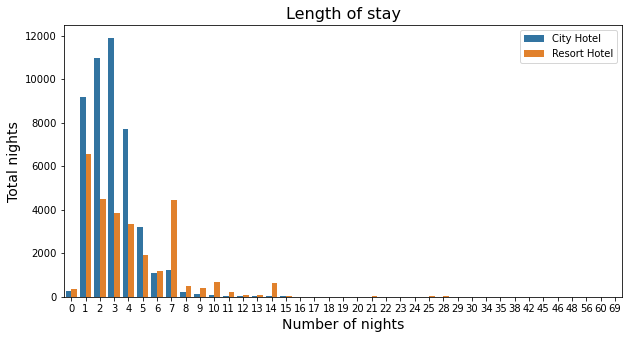

In [23]:
plt.figure(figsize=(10,5))
sns.barplot(data=stay,x="total_nights",y="Number of stays",hue="hotel")
plt.legend(loc="upper right")
plt.title("Length of stay", fontsize=16)
plt.xlabel("Number of nights", fontsize=14)
plt.ylabel("Total nights", fontsize=14)
plt.show()

In [24]:
#Bookings by market segment
segment=df["market_segment"].value_counts()

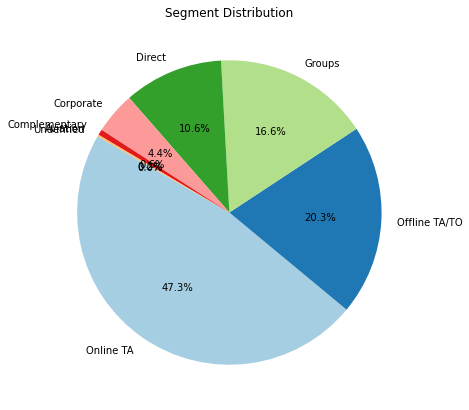

In [25]:
plt.figure(figsize=(7,7))
colors = plt.cm.Paired(range(len(segment))) 
plt.pie(segment, labels=segment.index, autopct='%1.1f%%', startangle=150, colors=colors)
plt.title("Segment Distribution")
plt.show()

In [26]:
#How many bookings were canceled?
total=df[df["is_canceled"]==1].shape[0]
percentage=total/df.shape[0]*100

total_rh = df.loc[df["hotel"] == "Resort Hotel"]["is_canceled"].sum()
total_rh_percentage=total_rh/df.loc[df["hotel"] == "Resort Hotel"].shape[0]*100
total_ch = df.loc[df["hotel"] == "City Hotel"]["is_canceled"].sum()
total_ch_percentage=total_ch/df.loc[df["hotel"] == "City Hotel"].shape[0]*100

print(f"Total bookings canceled: {total:,} ({percentage:.0f} %)")
print(f"Resort hotel bookings canceled: {total_rh:,} ({total_rh_percentage:.0f} %)")
print(f"City hotel bookings canceled: {total_ch:,} ({total_ch_percentage:.0f} %)")

Total bookings canceled: 44,199 (37 %)
Resort hotel bookings canceled: 11,120 (28 %)
City hotel bookings canceled: 33,079 (42 %)


In [27]:
asd=df.loc[df["hotel"]=="Resort Hotel"]["is_canceled"].sum()
asd
#SAME
asc=df[(df["hotel"]=="Resort Hotel")&(df["is_canceled"])].shape[0]
asc

11120

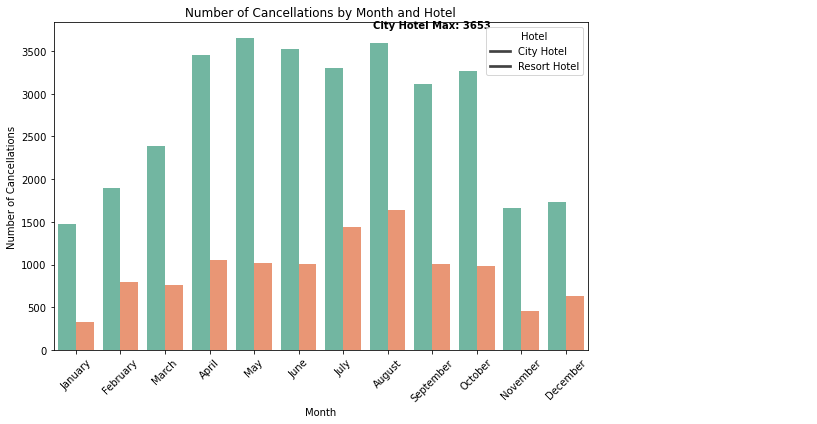

In [28]:
cancellations_by_month = df[df["is_canceled"] == 1].groupby(["hotel", "arrival_date_month"]).size().reset_index(name="cancellations")
cancellations_by_month=sort_month(cancellations_by_month, "arrival_date_month")
max_cancellations_city = cancellations_by_month[cancellations_by_month["hotel"] == "City Hotel"]["cancellations"].idxmax()
max_cancellations_resort = cancellations_by_month[cancellations_by_month["hotel"] == "Resort Hotel"]["cancellations"].idxmax()

plt.figure(figsize=(12, 6))
sns.barplot(data=cancellations_by_month, x="arrival_date_month", y="cancellations", hue="hotel", palette="Set2")
plt.xlabel("Month")
plt.ylabel("Number of Cancellations")
plt.title("Number of Cancellations by Month and Hotel")
plt.xticks(rotation=45)

plt.annotate(f"City Hotel Max: {cancellations_by_month.loc[max_cancellations_city, 'cancellations']}",
             (max_cancellations_city, cancellations_by_month.loc[max_cancellations_city, 'cancellations']),
             xytext=(0, 10), textcoords='offset points', ha='center', fontsize=10, color='black', weight='bold')

plt.annotate(f"Resort Hotel Max: {cancellations_by_month.loc[max_cancellations_resort, 'cancellations']}",
             (max_cancellations_resort, cancellations_by_month.loc[max_cancellations_resort, 'cancellations']),
             xytext=(0, 10), textcoords='offset points', ha='center', fontsize=10, color='black', weight='bold')

plt.tight_layout()
plt.legend(title="Hotel", labels=["City Hotel", "Resort Hotel"])
plt.show()


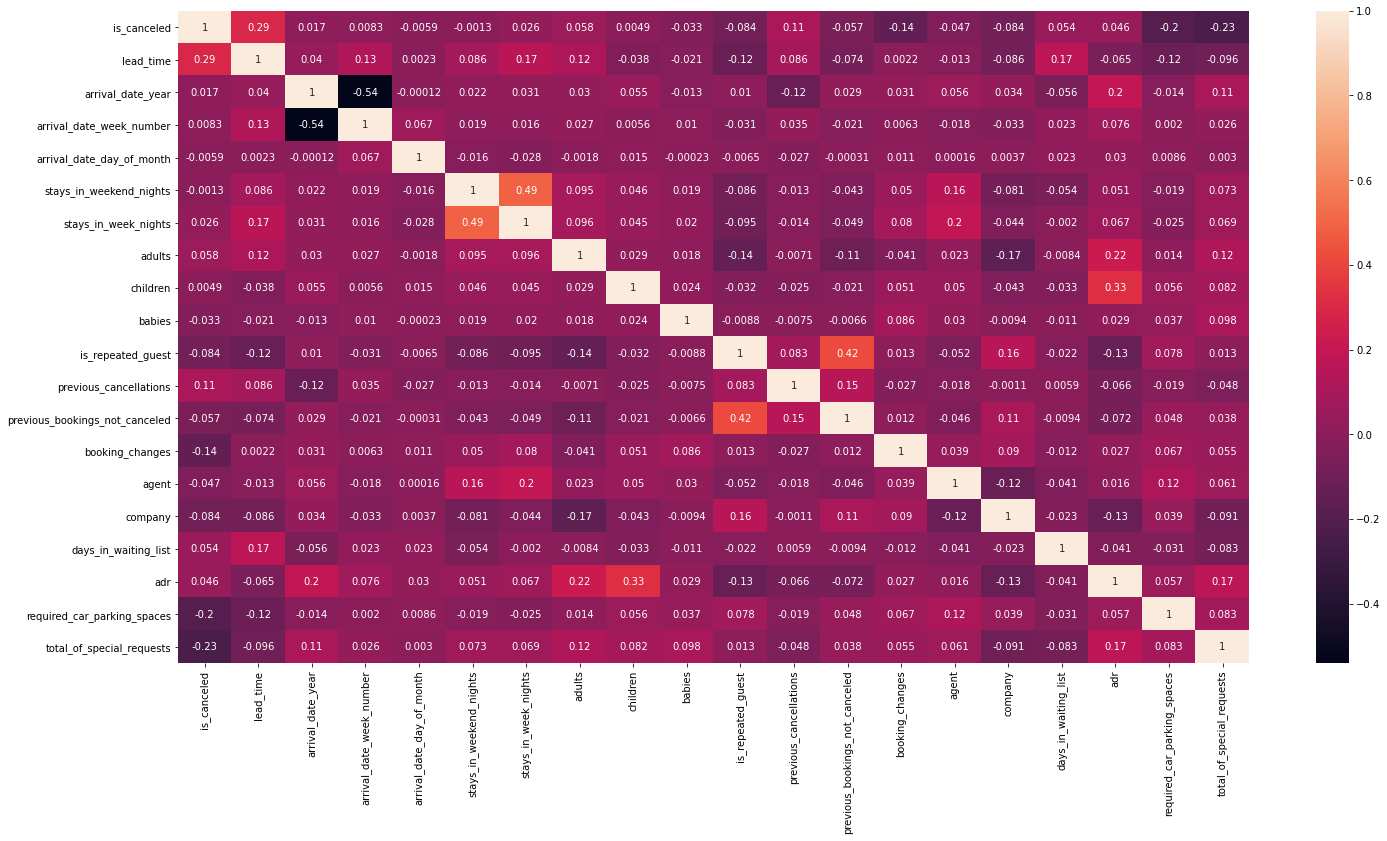

In [29]:
plt.figure(figsize=(24,12))
corr=df.corr()
sns.heatmap(corr,annot=True)
plt.show()

In [30]:
correlation=df.corr()["is_canceled"].abs().sort_values(ascending=False)[1:]
correlation

lead_time                         0.292876
total_of_special_requests         0.234877
required_car_parking_spaces       0.195701
booking_changes                   0.144832
previous_cancellations            0.110139
is_repeated_guest                 0.083745
company                           0.083594
adults                            0.058182
previous_bookings_not_canceled    0.057365
days_in_waiting_list              0.054301
agent                             0.046770
adr                               0.046492
babies                            0.032569
stays_in_week_nights              0.025542
arrival_date_year                 0.016622
arrival_date_week_number          0.008315
arrival_date_day_of_month         0.005948
children                          0.004851
stays_in_weekend_nights           0.001323
Name: is_canceled, dtype: float64

In [31]:
df.drop(['days_in_waiting_list', 'arrival_date_year', 'arrival_date_year', 'assigned_room_type', 'booking_changes',
               'reservation_status', 'country', 'days_in_waiting_list',"reservation_status_date"],axis=1,inplace=True)

In [32]:
cat_cols = [col for col in df.columns if df[col].dtype == 'O']
cat_cols

['hotel',
 'arrival_date_month',
 'meal',
 'market_segment',
 'distribution_channel',
 'reserved_room_type',
 'deposit_type',
 'customer_type']

In [33]:
columns=["children", "agent", "company", "adr"]
for i in columns:
    df[i] = df[i].astype(int)

In [34]:
num_cols = [col for col in df.columns if df[col].dtype == "int64" or df[col].dtype =="int32"]
num_cols.remove("is_canceled")
num_cols

['lead_time',
 'arrival_date_week_number',
 'arrival_date_day_of_month',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'children',
 'babies',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'agent',
 'company',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests']

In [35]:
label_encoder = LabelEncoder()
for i in cat_cols:
    df[i] = label_encoder.fit_transform(df[i])
df.tail()

,hotel,is_canceled,lead_time,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,deposit_type,agent,company,customer_type,adr,required_car_parking_spaces,total_of_special_requests
119385,0,0,23,1,35,30,2,5,2,0,0,0,5,3,0,0,0,0,0,394,0,2,96,0,0
119386,0,0,102,1,35,31,2,5,3,0,0,0,6,3,0,0,0,4,0,9,0,2,225,0,2
119387,0,0,34,1,35,31,2,5,2,0,0,0,6,3,0,0,0,3,0,9,0,2,157,0,4
119388,0,0,109,1,35,31,2,5,2,0,0,0,6,3,0,0,0,0,0,89,0,2,104,0,0
119389,0,0,205,1,35,29,2,7,2,0,0,2,6,3,0,0,0,0,0,9,0,2,151,0,2


In [36]:
features = num_cols + cat_cols
X = df.drop(["is_canceled"], axis=1)[features]
y = df["is_canceled"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [37]:
classification={
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "XGB Classifier": XGBClassifier()
}
result=pd.DataFrame(columns=["accuracy","precision","f1","recall"])
for method,func in classification.items():
    func.fit(X_train,y_train)
    y_pred=func.predict(X_test)
    accuracy=accuracy_score(y_test,y_pred)
    precision=precision_score(y_test,y_pred)
    f1=f1_score(y_test,y_pred)
    recall=recall_score(y_test,y_pred)
    result.loc[method]=[accuracy,precision,f1,recall]
result

,accuracy,precision,f1,recall
Decision Tree,0.822163,0.754027,0.760722,0.767537
Random Forest,0.864217,0.856115,0.804572,0.758882
Gradient Boosting,0.816738,0.839803,0.713924,0.620862
XGB Classifier,0.842407,0.845878,0.765811,0.699590


In [46]:
forest_model=RandomForestClassifier()

In [47]:
forest_params={'n_estimators':[100, 200, 300],'max_depth':[5, 10, 20, 30,None],'min_samples_split':[2, 5, 10],'min_samples_leaf': [1, 2, 4]}

In [48]:
forest_best_grid=GridSearchCV(forest_model,forest_params,cv=5,n_jobs=1,verbose=True).fit(X_train,y_train)

Fitting 5 folds for each of 135 candidates, totalling 675 fits


In [49]:
best_model=forest_best_grid.best_estimator_

In [50]:
forest_best_grid.best_params_

{'max_depth': 30,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 300}

In [51]:
forest_final=forest_model.set_params(**forest_best_grid.best_params_).fit(X_train,y_train)

In [54]:
cv_results=cross_validate(forest_final,X_train,y_train,cv=5,scoring=["accuracy","f1","roc_auc"])

In [70]:
cv_results["test_accuracy"].mean()

0.8662624574382491

In [71]:
cv_results["test_f1"].mean()

0.8078969051042681

In [72]:
cv_results["test_roc_auc"].mean()

0.9292354630268717